# Particle in a Box

In [15]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Particles as Waves

Particle-wave duality is a familiar concept to the 21st century folk. In one dimension, particles obey the 1D Schr&ouml;dinger equation

$$
i\hbar\partial_t\Psi(x, t) = \hat{H}\Psi(x, t)\,.
$$

For a particle in a 1D potential well, $\hat{H} = -\hbar^2/(2m) \partial_x^2 + V(x)$, where $V(x)$ is the potential energy. Inside the box, $V(x) = 0$; outside the box, $V(x) = \infty$. Within the box, the Schr&ouml;dinger equation becomes

$$
i\hbar\partial_t\Psi(x, t) = -\frac{\hbar^2}{2m}\partial_x^2\Psi(x, t)\,.
$$
Writing $\Psi(x, t) = X(x)T(t)$ yields

$$
i\hbar X(x)T'(t) = -\frac{\hbar^2}{2m}X''(x)T(t)\rightarrow 
i\frac{2m}{\hbar} \frac{T'(t)}{T(t)} = -\frac{X''(x)}{X(x)} = k^2\,.
$$
Solving for $X(x)$ and $T(t)$, we have

$$
X_k(x) = A_k \cos(k x) + B_k \sin(k x)
$$
and
$$
T_k(t) = C_k \exp\left(-ik^2\frac{\hbar}{2m}t\right)\,.
$$
Combining the two functions gives

$$
\Psi_k(x,t) = \left[A_k \cos(k x) + B_k \sin(k x)\right]\exp\left(-ik^2\frac{\hbar}{2m}t\right)
$$
Using the boundary conditions $\Psi_k(x = 0, t) = A_k \exp\left(-ik^2\frac{\hbar}{2m}t\right) = 0$, so that $A_k = 0$. For the box of width $L$, $\Psi_k(x = L, t) = 0$, leading to $kL = n\pi$. Hence

$$
\Psi_n(x,t) = A_n \sin\left(\frac{n\pi x}{L}\right)
\exp\left[-i\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2t/\hbar\right]
$$

**Note**: The quantity $\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2$ has the dimensions of energy, corresponding to the *allowed energy levels* inside the box. Because $n$ has to be an integer, the allowed energy levels are *discrete* or *quantized*.


## Dimensional Simplification
There are many constants in the equation of $\Psi_n$. To simplify the expression, we express $x$ in terms of $L$ so that $x / L \rightarrow x$. Also, we combine $\hbar / mL^2\rightarrow M$ to get:

$$
\Psi_n(x,t) = A_n \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Because $|\Psi|^2$ corresponds to the probability, integrating it over the size of the box should give 1, giving us the value of the normalization constant $A_n$:

$$
\Psi_n(x,t) = \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Now that we have the modes, we can write down the total wavefunction as a linear combination of the modes:

$$
\Psi(x,t) = \sum_n c_n \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,,
$$
where $c_n$ are the coefficients.

### Question 1

Let $M$ = 1. At $t = 0$, $\Psi(x) = \Psi_n(x)$. Show that $|\Psi_n(x,t)|^2$ remains unchanged as $t$ changes.

In [21]:
L = 0.5
M = 1
n_harm = 100

def initial_deformation(x):
    return x if x < (L / 2) else L - x

def C_n(n):
    func = lambda x: initial_deformation(x) * np.sqrt(2) * np.sin(n * np.pi * x)
    integral = integrate.quad(func, 0, L)
    return (2 / L * integral[0])

def term(x, t, n):
    exp_power = -1j * ((np.pi**2 * n**2) / (2 * M)) * t
    return (C_n(n) * np.sqrt(2) * np.sin(n * np.pi * x) * np.exp(exp_power))

def wavefunction(x, t):
    return np.sum([term(x, t, n) for n in range(1, n_harm + 1)])

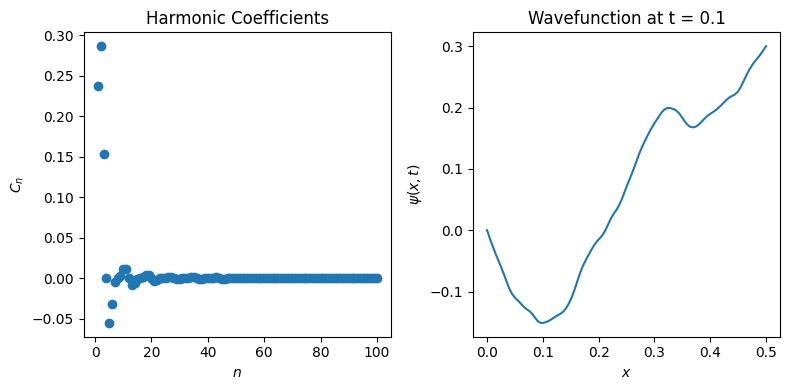

In [25]:
nPts = 100
t = 0.1

C_ns = [C_n(n) for n in range(1, n_harm + 1)]
xs = np.linspace(0, L, nPts)
res = [wavefunction(x, t) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(range(1, n_harm + 1), C_ns)
ax1.set(xlabel="$n$", ylabel="$C_n$", title = "Harmonic Coefficients")
ax2.plot(xs, res)
ax2.set(xlabel="$x$", ylabel="$\psi(x, t)$", title = "Wavefunction at t = " + str(t))
plt.tight_layout()

In [84]:
max_t = 100
ts = list(range(0, max_t + 1))

nPts = 100
xs = np.linspace(0, L, nPts)
n = 1


unchanged = []
for x in xs:
    res = [np.abs(term(x, t, n))**2 for t in ts]
    is_unchanged = np.isclose(res, res[0], 0, atol=1e10)
    unchanged.append(is_unchanged)

np.any(unchanged == False)

False

### Question 2
At $t= 0$, let $\Psi(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x - 1/2)^2}{2\sigma^2} \right] - \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(0 - 1/2)^2}{2\sigma^2} \right]$. Keep $\sigma$ smaller than 1 (plot it to make sure the entire wavefunction is INSIDE the box).

Set $M = 1$ and calculate $c_n$'s. Show how $|\Psi_n(x,t)|^2$ changes in time. 

### Question 3

Play with $M$. How does the system's evolution with time change with $M$?